In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
eps_value = 0.5 # Example value, needs tuning based on scaled data distribution
min_samples_value = 5 # Example value, often 2*n_features

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

In [5]:
labels_dbscan = dbscan.fit_predict(X_scaled)
supervised = dataset.copy() # Make a copy
supervised['Cluster_group'] = labels_dbscan

In [6]:
supervised.to_csv("cluster_dbscan.csv", index=False)
print("Cluster labels assigned and saved to cluster_dbscan.csv")

Cluster labels assigned and saved to cluster_dbscan.csv


In [7]:
unique_labels = np.unique(labels_dbscan)
n_clusters_ = len(unique_labels) - (1 if -1 in unique_labels else 0)

In [8]:
print(f"\nNumber of estimated clusters (DBSCAN): {n_clusters_}")
print(f"Noise points (cluster -1): {np.sum(labels_dbscan == -1)} points")
print(f"DBSCAN parameters used: eps={eps_value}, min_samples={min_samples_value}")


Number of estimated clusters (DBSCAN): 2
Noise points (cluster -1): 8 points
DBSCAN parameters used: eps=0.5, min_samples=5


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


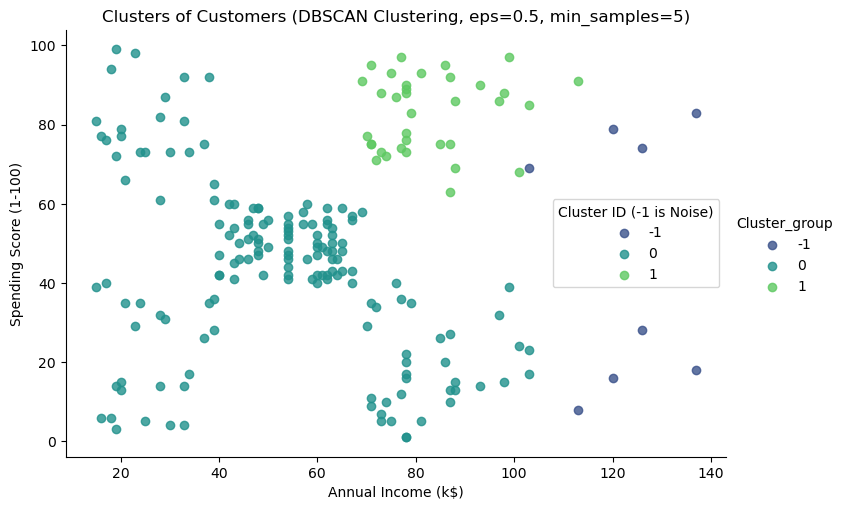

In [9]:
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True, palette='viridis', aspect=1.5)

plt.title(f'Clusters of Customers (DBSCAN Clustering, eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel(supervised.columns[3])
plt.ylabel(supervised.columns[4])
plt.legend(title='Cluster ID (-1 is Noise)')
plt.show()